<a href="https://colab.research.google.com/github/mukhairatil/sentiment-analysis-indoroberta/blob/main/tes_penelitian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
!pip install google-play-scraper pandas

In [93]:
from google_play_scraper import Sort, reviews
import pandas as pd

In [94]:
result, continuation_token = reviews(
    'id.co.bri.brimo',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=500
)

#id.co.bri.brimo → package BRImo
#sort=NEWEST → dari terbaru
#count=500 → ambil dulu banyak, nanti difilter

In [95]:
df = pd.DataFrame(result)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a4b81753-ec1c-4ef4-8390-95b6ea4bccbc,Ajaz jak,https://play-lh.googleusercontent.com/a/ACg8oc...,makin diupdate bkn'y bagus tapi makin lemet pa...,1,0,2.92.0,2025-12-23 00:20:18,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-04-12 10:35:41,2.92.0
1,e9a143b1-a8bd-49bf-80fa-05a39691e51b,Kel duK,https://play-lh.googleusercontent.com/a/ACg8oc...,lengkap dan mudah,5,0,2.91.0,2025-12-23 00:09:33,"Hai Sobat BRI, terima kasih atas ulasannya 😊. ...",2025-12-23 00:37:52,2.91.0
2,3594f64e-e33a-453d-b46c-5660802222dc,Thiia Amanda,https://play-lh.googleusercontent.com/a/ACg8oc...,kenapa mau login harus verifikasi awal lagi fo...,5,0,2.92.0,2025-12-22 23:58:59,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-12-23 00:04:04,2.92.0
3,e5580a66-84a1-4b09-9bcc-2d5dfecfd9ea,Arkana Nuryati,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat memudahkan kan kita transaksi,5,0,2.92.0,2025-12-22 23:49:45,"Hai Sobat BRI, terima kasih atas ulasannya ☺️....",2025-12-23 00:03:58,2.92.0
4,fc97a711-5b14-4f08-b350-d85c477b5161,Aa Bb,https://play-lh.googleusercontent.com/a/ACg8oc...,baik,5,0,2.92.0,2025-12-22 23:45:25,"Hai Sobat BRI, terima kasih atas ulasannya ☺️....",2025-12-23 00:06:57,2.92.0


In [96]:
df['at'] = pd.to_datetime(df['at'])

In [97]:
df_desember = df[
    (df['at'].dt.month == 12) &
    (df['at'].dt.year == 2025)
]

In [98]:
len(df_desember)

500

In [99]:
df_100 = df_desember.head(100)

In [100]:
df_100 = df_100[['content', 'score', 'at']]
df_100.columns = ['review', 'rating', 'date']

In [101]:
df_100.head()

,review,rating,date
0,makin diupdate bkn'y bagus tapi makin lemet pa...,1,2025-12-23 00:20:18
1,lengkap dan mudah,5,2025-12-23 00:09:33
2,kenapa mau login harus verifikasi awal lagi fo...,5,2025-12-22 23:58:59
3,sangat memudahkan kan kita transaksi,5,2025-12-22 23:49:45
4,baik,5,2025-12-22 23:45:25


In [102]:
len(df_100)

100

In [103]:
df_100.to_csv("brimo_100_desember.csv", index=False)

In [104]:
!ls

brimo_100_desember.csv	logs  results  sample_data  wandb


In [105]:
df = df_100.copy()

In [106]:
print(len(df))

100


In [107]:
df.isnull().sum()
#cek missing value

,0
review,0
rating,0
date,0


In [108]:
df.columns


Index(['review', 'rating', 'date'], dtype='object')

In [109]:
df = df.drop_duplicates(subset="review")

In [110]:
import re
def clean_text(text):
    # Case folding
    text = text.lower()
    # Hapus mention, link, dan karakter spesial (noise)
    text = re.sub(r'@[A-Za-z0-9_]+|https?://\S+|#\S+|[^\w\s]', '', text)
    # Hapus angka yang tidak penting
    text = re.sub(r'\d+', '', text)
    # Contoh Normalisasi sederhana (bisa kamu tambah sendiri list-nya)
    norm_dict = {'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'bgt': 'banget', 'apps': 'aplikasi'}
    for word, replacement in norm_dict.items():
        text = re.sub(r'\b' + word + r'\b', replacement, text)
    return text.strip()



In [111]:
df['cleaned_text'] = df['review'].apply(clean_text)

In [112]:
df[["review", "cleaned_text"]].head()


,review,cleaned_text
0,makin diupdate bkn'y bagus tapi makin lemet pa...,makin diupdate bkny bagus tapi makin lemet par...
1,lengkap dan mudah,lengkap dan mudah
2,kenapa mau login harus verifikasi awal lagi fo...,kenapa mau login harus verifikasi awal lagi fo...
3,sangat memudahkan kan kita transaksi,sangat memudahkan kan kita transaksi
4,baik,baik


In [113]:
# 3. LABELING
# 1-2: Negatif (0), 3: Netral (1), 4-5: Positif (2)
def create_label(score):
    if score <= 2:
        return 0
    elif score == 3:
        return 1
    else:
        return 2

In [114]:
df['label'] = df['rating'].apply(create_label)

In [115]:
df[["rating", "label"]].value_counts()


,,count
rating,label,
5,2,66
1,0,15
2,0,6
3,1,4
4,2,4


In [116]:
df["label"].value_counts()


,count
label,
2,70
0,21
1,4


In [117]:
df["text_length"] = df["cleaned_text"].apply(len)
df["text_length"].describe()

,text_length
count,95.000000
mean,49.231579
std,56.211313
min,2.000000
25%,15.000000
50%,29.000000
75%,62.000000
max,374.000000


In [118]:
df = df[df["cleaned_text"].str.len() > 0]

In [119]:
df["text_length"].describe()


,text_length
count,95.000000
mean,49.231579
std,56.211313
min,2.000000
25%,15.000000
50%,29.000000
75%,62.000000
max,374.000000


In [120]:
# X berisi teks ulasan yang sudah dibersihkan
X = df["cleaned_text"]

# y berisi label sentimen (negatif, netral, positif)
y = df["label"]

In [121]:
from sklearn.preprocessing import LabelEncoder

# Membuat encoder untuk mengubah label teks menjadi angka
label_encoder = LabelEncoder()

# Mengubah label sentimen menjadi angka
y_encoded = label_encoder.fit_transform(y)


In [122]:
# Melihat urutan kelas sentimen
label_encoder.classes_

array([0, 1, 2])

In [123]:
# Pastikan jumlah data sama
print(len(X), len(y_encoded))

95 95


In [124]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi train (80%) dan test (20%)
# stratify=y → supaya proporsi sentimen tetap seimbang
# random_state=42 → supaya hasil bisa direproduksi
X_train, X_test, y_train, y_test = train_test_split(
    X,          # data teks
    y,          # label sentimen
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [125]:
print("Train data :", len(X_train))
print("Test data  :", len(X_test))

Train data : 76
Test data  : 19


In [126]:
print(len(df))

95


In [127]:
# Reset index agar urut dari 0
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)


In [128]:
import pandas as pd

print("Distribusi train:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi test:")
print(pd.Series(y_test).value_counts())


Distribusi train:
label
2    56
0    17
1     3
Name: count, dtype: int64

Distribusi test:
label
2    14
0     4
1     1
Name: count, dtype: int64


In [129]:
# Install library transformers (biasanya sudah ada di Colab, tapi aman)
!pip install transformers

In [130]:
from transformers import AutoTokenizer

# Load tokenizer IndoRoBERTa
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

In [131]:
train_encodings = tokenizer(
    list(X_train),
    padding=True,
    truncation=True,
    max_length=128
)

test_encodings = tokenizer(
    list(X_test),
    padding=True,
    truncation=True,
    max_length=128
)


In [132]:
print(train_encodings.keys())

KeysView({'input_ids': [[2, 5435, 50, 5435, 50, 3825, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 1671, 2152, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 842, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 7424, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 1339, 310, 4628, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 903, 3730, 1107, 271, 34, 368, 804, 43, 4968, 209, 916, 354, 90, 2466, 805, 92, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 7250, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 18157, 3107, 8126, 94, 11537, 30023, 191, 11537, 3122, 19, 166, 804, 423, 18230, 3122, 19, 3370, 2468, 92, 4444, 258

In [133]:
print(train_encodings["input_ids"][0][:20])
print(train_encodings["attention_mask"][0][:20])


[2, 5435, 50, 5435, 50, 3825, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [134]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.tolist()  # ✅ UBAH KE LIST

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])  # ✅ AMAN
        return item

    def __len__(self):
        return len(self.labels)



In [135]:
train_dataset = SentimentDataset(train_encodings, y_train)
test_dataset  = SentimentDataset(test_encodings, y_test)

In [136]:
print(len(train_dataset))
print(len(test_dataset))

print(train_dataset[0])


76
19
{'input_ids': tensor([   2, 5435,   50, 5435,   50, 3825,    5,    3,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'labels': tensor(2)}


In [137]:
from huggingface_hub import login
login()



In [138]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Pastikan nama model benar: 'indo-roberta-indonli' (pakai 'indo', bukan 'indonesian')
model_name = "StevenLimcorn/indo-roberta-indonli"

# Memuat Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Memuat Model
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set model ke mode evaluasi
model.eval()

print("Model dan Tokenizer berhasil dimuat!")

Model dan Tokenizer berhasil dimuat!


In [139]:
print(model)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [140]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",           # versi lama
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    push_to_hub=False
)

In [141]:
from transformers import Trainer

trainer = Trainer(
    model=model,                    # IndoRoBERTa
    args=training_args,             # pengaturan training
    train_dataset=train_dataset,    # data latih
    eval_dataset=test_dataset       # data uji
)

In [142]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
1,0.942900,0.714622
2,0.516200,0.791692
3,0.405900,0.805854


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=30, training_loss=0.6216529210408529, metrics={'train_runtime': 225.1011, 'train_samples_per_second': 1.013, 'train_steps_per_second': 0.133, 'total_flos': 4335204671784.0, 'train_loss': 0.6216529210408529, 'epoch': 3.0})

In [143]:
# Melakukan prediksi pada data test
predictions = trainer.predict(test_dataset)

In [144]:
import numpy as np

# Ambil label prediksi (hasil model)
y_pred = np.argmax(predictions.predictions, axis=1)

# Ambil label asli
y_true = predictions.label_ids

In [145]:
from sklearn.metrics import classification_report, accuracy_score

In [146]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6842105263157895


In [147]:
import numpy as np

print("Label asli di test:", np.unique(y_true))
print("Label prediksi:", np.unique(y_pred))


Label asli di test: [0 1 2]
Label prediksi: [0 2]


In [148]:
import pandas as pd

pd.Series(y_true).value_counts()


,count
2,14
0,4
1,1


In [149]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    labels=[0, 1, 2],
    target_names=["Negatif", "Netral", "Positif"],
    zero_division=0
))


              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         4
      Netral       0.00      0.00      0.00         1
     Positif       0.72      0.93      0.81        14

    accuracy                           0.68        19
   macro avg       0.24      0.31      0.27        19
weighted avg       0.53      0.68      0.60        19



In [150]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd

In [151]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    y_true,
    y_pred,
    labels=[0, 1, 2]
)

cm_df = pd.DataFrame(
    cm,
    index=["Negatif", "Netral", "Positif"],
    columns=["Negatif", "Netral", "Positif"]
)

cm_df


,Negatif,Netral,Positif
Negatif,0,0,4
Netral,0,0,1
Positif,1,0,13


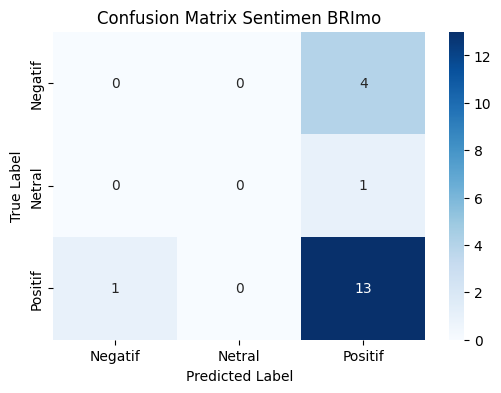

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Sentimen BRImo")
plt.show()


In [153]:
print(model.config.id2label)

{0: 'Contradiction', 1: 'Neutral', 2: 'Entailment'}


In [154]:
text = "Aplikasi BRImo sering error dan lambat"

inputs = tokenizer(
    text,
    return_tensors="pt",
    truncation=True,
    padding=True,
    max_length=128
)

In [155]:
import torch.nn.functional as F

outputs = model(**inputs)
logits = outputs.logits
probs = F.softmax(logits, dim=1)

print("Logits:", logits)
print("Probabilitas Softmax:", probs)

Logits: tensor([[-1.0234, -1.1670,  2.0921]], grad_fn=<AddmmBackward0>)
Probabilitas Softmax: tensor([[0.0410, 0.0355, 0.9236]], grad_fn=<SoftmaxBackward0>)


In [167]:
def predict_sentiment(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    )
    outputs = model(**inputs)
    pred = torch.argmax(outputs.logits, dim=1).item()

    label_map = {0: "Negatif", 1: "Netral", 2: "Positif"}
    return label_map[pred]

predict_sentiment("Aplikasi BRImo sangat membantu transaksi sehari-hari")


'Positif'

In [171]:
# Daftar aspek dan kata kunci
aspek_dict = {
    "Login": ["login", "masuk", "otp", "verifikasi"],
    "Transaksi": ["transfer", "pembayaran", "top up", "saldo"],
    "Performa": ["lambat", "error", "lemot", "crash"],
    "Keamanan": ["aman", "keamanan", "pin", "biometrik"]
}


In [158]:
def detect_aspect(text, aspek_dict):
    aspek_found = []
    for aspek, keywords in aspek_dict.items():
        for kw in keywords:
            if kw in text:
                aspek_found.append(aspek)
                break
    return aspek_found


In [159]:
df["aspek"] = df["cleaned_text"].apply(
    lambda x: detect_aspect(x, aspek_dict)
)


In [160]:
df[["cleaned_text", "aspek"]].head()


,cleaned_text,aspek
0,makin diupdate bkny bagus tapi makin lemet par...,[]
1,lengkap dan mudah,[]
2,kenapa mau login harus verifikasi awal lagi fo...,[Login]
3,sangat memudahkan kan kita transaksi,[]
4,baik,[]


In [161]:
df_aspek = df.explode("aspek")
df_aspek = df_aspek.dropna(subset=["aspek"])


In [162]:
sentimen_map = {
    0: "Negatif",
    1: "Netral",
    2: "Positif"
}

df_aspek["sentimen_label"] = df_aspek["label"].map(sentimen_map)


In [163]:
aspek_sentimen = (
    df_aspek
    .groupby(["aspek", "sentimen_label"])
    .size()
    .reset_index(name="jumlah")
)

aspek_sentimen


,aspek,sentimen_label,jumlah
0,Keamanan,Negatif,3
1,Keamanan,Positif,2
2,Login,Negatif,5
3,Login,Netral,1
4,Login,Positif,7
5,Transaksi,Negatif,2
6,Transaksi,Positif,1


In [164]:
!pip install wordcloud

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

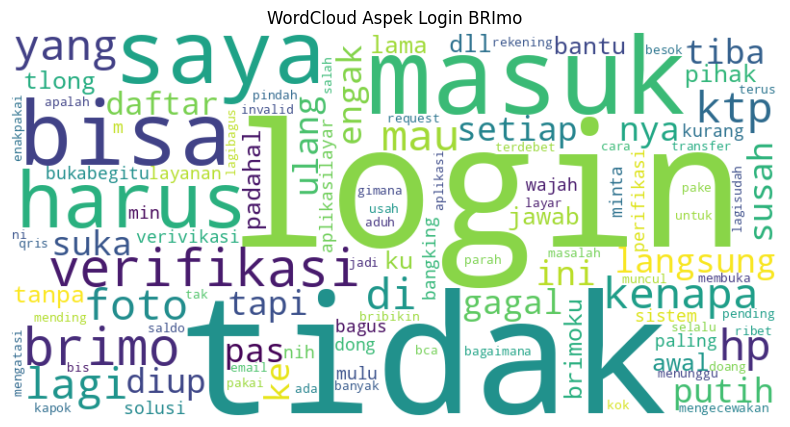

In [172]:
text_performa = " ".join(
    df_aspek[df_aspek["aspek"] == "Login"]["cleaned_text"]
)

wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text_performa)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Aspek Login BRImo")
plt.show()


In [170]:
print(df_aspek["aspek"].unique())

['Login' 'Keamanan' 'Transaksi']
